# 『1과목 : 』AI기반 데이터 분석

## 『1-9』 머신러닝 기반 데이터 분석-지도

### Setting Up

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

### Ensemble Learning

배깅(Bagging)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("datasets/kc-house-data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
nCar=data.shape[0]
nVar=data.shape[1]
print(nCar, nVar)

21613 21


In [4]:
data=data.drop(['id','date','zipcode','lat','long'],axis=1)

In [5]:
feature_columns=list(data.columns.difference(['price']))
X=data[feature_columns]
y=data['price']

In [6]:
X

,bathrooms,bedrooms,condition,floors,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
0,1.00,3,3,1.0,7,1180,0,1180,1340,5650,5650,0,0,1955,0
1,2.25,3,3,2.0,7,2170,400,2570,1690,7242,7639,0,0,1951,1991
2,1.00,2,3,1.0,6,770,0,770,2720,10000,8062,0,0,1933,0
3,3.00,4,5,1.0,7,1050,910,1960,1360,5000,5000,0,0,1965,0
4,2.00,3,3,1.0,8,1680,0,1680,1800,8080,7503,0,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,3,3,3.0,8,1530,0,1530,1530,1131,1509,0,0,2009,0
21609,2.50,4,3,2.0,8,2310,0,2310,1830,5813,7200,0,0,2014,0
21610,0.75,2,3,2.0,7,1020,0,1020,1020,1350,2007,0,0,2009,0
21611,2.50,3,3,2.0,8,1600,0,1600,1410,2388,1287,0,0,2004,0


In [7]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [8]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(15129, 15) (6484, 15) (15129,) (6484,)


In [9]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
# 선형회귀모델생성
regression_model=LinearRegression()
# 훈련
linear_model1=regression_model.fit(train_x, train_y)
# 예측
predict1=linear_model1.predict(test_x)
# 결과 인쇄
print('RMSE: {}'.format(math.sqrt(mean_squared_error(predict1, test_y))))

RMSE: 223893.60561816196


Random Forest

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

#loading the iris dataset
iris = load_iris()

#training data 설정
x_train = iris.data[:-30]
y_train = iris.target[:-30]
#test data 설정
x_test = iris.data[-30:] # test feature data
y_test = iris.target[-30:] # test target data

print(y_train)

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
#RandomForestClassifier libary를 import
from sklearn.ensemble import RandomForestClassifier
#tree 의 개수 Random Forest 분류 모듈 생성
rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [12]:
rfc.fit(x_train, y_train)
#Test data를 입력해 target data를 예측
prediction = rfc.predict(x_test)
#예측 결과 precision과 실제 test data의 target 을 비교
print (prediction==y_test)

[ True False  True False  True  True False False  True  True  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [13]:
#Random forest 정확도 츶정
rfc.score(x_test, y_test)

0.7666666666666667

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print ("Accuracy is : ",accuracy_score(prediction, y_test))
print ("=======================================================")
print (classification_report(prediction, y_test))

Accuracy is :  0.7666666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      1.00      0.87        23

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print (y_test)
print (Y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 0 0 1 0 2 1 2 0 1 2 1 2 0 2 2 1 0 1 1 2 0 2 1 2 0 1 0 2]


In [16]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
prediction_1 = rfc.predict(X_test)
#print (prediction_1 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_1, Y_test))
print ("=======================================================")
print (classification_report(prediction_1, Y_test))

Accuracy is :  0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.79      0.88        14
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.93      0.90        30
weighted avg       0.93      0.90      0.90        30



In [17]:
# Initialize the model
clf_2 = RandomForestClassifier(n_estimators=200, # Number of trees
                               max_features=4,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)
print (prediction_2 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_2, Y_test))
print ("=======================================================")
print (classification_report(prediction_2, Y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True]
Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.013677529508136204
sepal width (cm) 0.013976957240145959
petal length (cm) 0.49405176475850704
petal width (cm) 0.4782937484932109


특성 중요도

In [19]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.6 MB/s eta 0:00:00


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


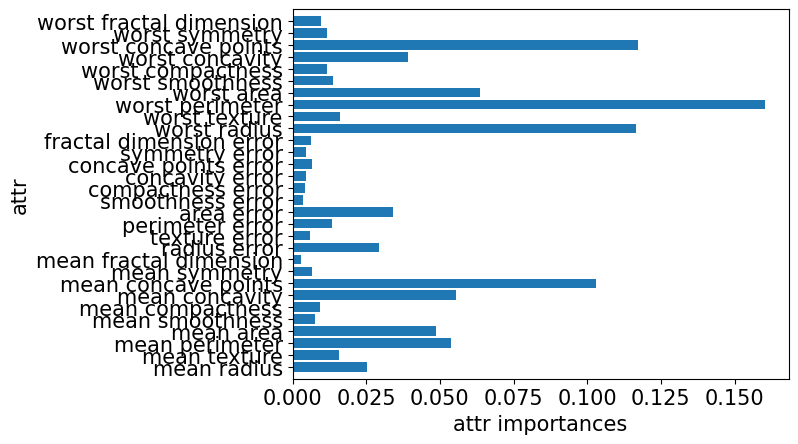

In [21]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(forest)

AdaBoost 사용해 보기

In [22]:
# 1. 에이다 부스트
# 라이브러리 임포트
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
adaboost=AdaBoostClassifier(random_state=0)
# 훈련
rs_ada=adaboost.fit(data, target)
rs_ada.feature_importances_

array([0.        , 0.05832968, 0.36761435, 0.57405598])

Gradient Boost(GBM) 사용해 보기


In [23]:
# 라이브러리 임포트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
gradientboost=GradientBoostingClassifier(random_state=0)
# 훈련
rs_gb=gradientboost.fit(data, target)
rs_gb.feature_importances_

array([0.00637865, 0.01241147, 0.30658526, 0.67462463])

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

# 훈련 세트 정확도 : 1.000
# 테스트 세트 정확도 : 0.958
# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [26]:
# 과대적합을 막기위해 학습률을 낮춘다

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.958


In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

# 훈련 세트 정확도 : 0.991
# 테스트 세트 정확도 : 0.972
# 특성 중요도

print("특성 중요도 : \n{}".format(gbrt.feature_importances_))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


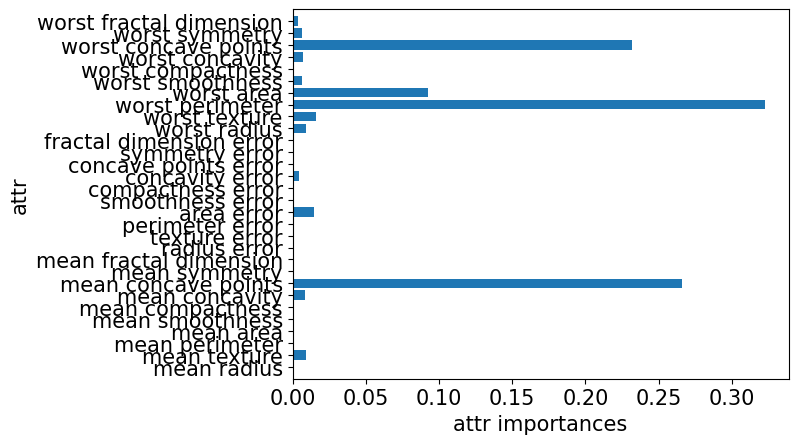

In [28]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(gbrt)


### 지도_수치 예측

SVM(Support Vector Machine)

Scikit-Learn의 서포트 벡터 머신

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

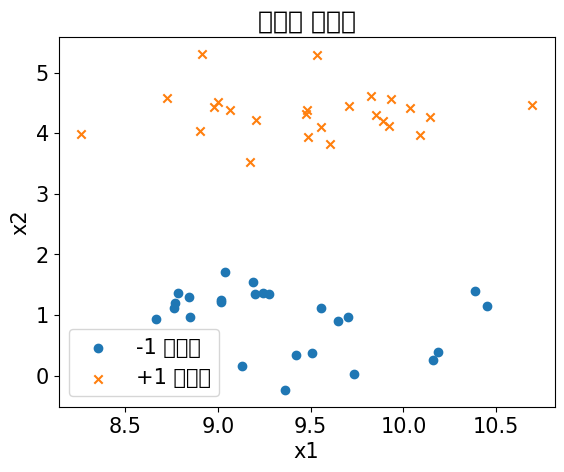

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]
classifier.fit(training_points, labels)

SVC(kernel='linear')

In [31]:
print(classifier.predict([[3, 2]]))

[1]


In [32]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


In [33]:
print("학습 데이터 점수: {}".format(classifier.score(training_points , labels )))

학습 데이터 점수: 1.0


붓꽃 문제에의 응용


In [34]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [35]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mp.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)

/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3829703612.py:11: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

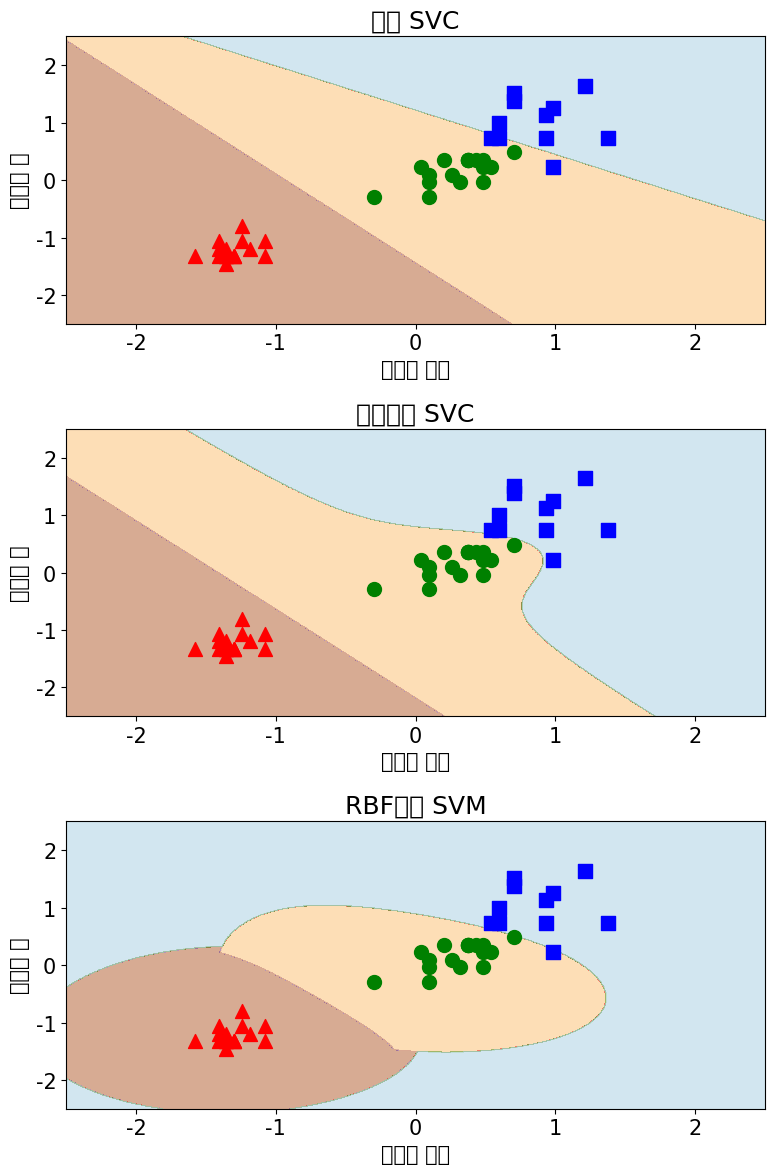

In [36]:
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()


### 인공 신경망 분석

In [37]:
# sklearn의 datasets에서 load_iris를 로드
from sklearn.datasets import load_iris
# iris데이터셋을 iris라는 변수에 저장
iris = load_iris()

# iris에 있는 key값을 나타냄
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
# iris의 데이터에 해당하는 부분의 X와 Y의 크기를 나타냄
iris['data'].shape

(150, 4)

In [39]:
# iris데이터셋의 0번째부터 9번째까지를 슬라이싱해서 나타냄
iris['data'][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [40]:
# X에는 iris데이터의 값 150x4의 크기를 입력
# y에는 분류하고자 하는 target변수를 입력
# target변수는 데이터가 무엇인지에 대해 판별하는 값
# iris target의 경우 0, 1, 2로 구분됨
X = iris['data']
y = iris['target']

# 위의 데이터를 train과 test로 구분
# sklearn의 model_selection 내에 train_test_split를 로드
# train_test_split를 이용해 위의 X변수에 선언한 data값과 y변수에 선언한 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
# sklearn 내에 preprocessing의 StandardScaler를 로드
# StandardScaler는 정규화를 시키는 함수
# StandardScaler는 데이터의 범위를 평균 0, 표준편차 1의 범위로 바꿔주는 함수
# 그리고 StandardScaler를 scaler라는 변수에 저장해 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# StandardScaler를 담은 변수에 X_train을 학습해 데이터를 정규화
scaler.fit(X_train)

# X_train과 X_test를 StandardScaler를 이용해 정규화
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# 다중인공신경망(MLP) 분류 알고리즘을 sklearn의 neural_network에서 로드
from sklearn.neural_network import MLPClassifier

# MLP 알고리즘의 히든레이어를 3계층(10,10,10)으로 할당
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [43]:
# 위에서 분류한 X_train과 y_train을 MLP를 이용해 학습
mlp.fit(X_train, y_train)

# mlp로 학습한 내용을 X_test에 대해 예측하여 predictions변수에 저장
predictions = mlp.predict(X_test)

# sklearn.metrics의 confusion_matrix와 classification_report를 로드
# confusion_matrix는 데이터가 맞는지의 유무를 판단
# classification_report는 precision과 recall 그리고 f1_score등을 계산해 정확률에 대해 계산
from sklearn.metrics import classification_report, confusion_matrix

# confusion_matrix를 이용해 실제값 y_test와 예측값에 대해 비교
print(confusion_matrix(y_test, predictions))

[[12  0  0]
 [ 0 14  2]
 [ 0  2  8]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# classification_report를 이용해 정확률, 재현율, f1-score를 확인
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.80      0.80      0.80        10

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38

